In [45]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [46]:
def getxy():
    exceptCol = [
        '地理区域',
        '平均货物吞吐量',
        '人均GDP',
        '物流总成本占GDP的平均比例',
    ]

    df = pd.read_excel(r'../数据预处理/xlsx/合并修正缩放后总数据.xlsx', sheet_name='已编码汇总')
    df.drop(columns=exceptCol, inplace=True, axis=1)
    X = df
    y = df.pop('售价')
    return X, y

-----------[Ridge]岭回归-----------


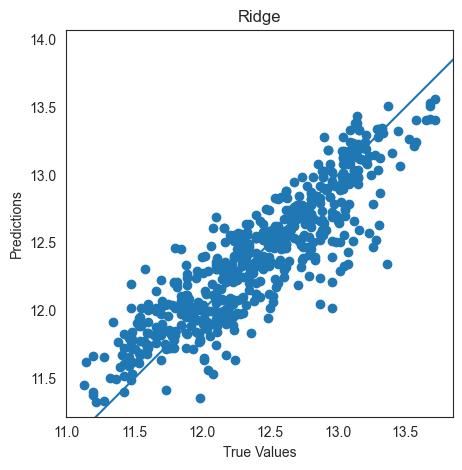

[Ridge]岭回归 r2_score: 0.7880314140280678
[Ridge]岭回归 mse: 0.06595616755851745
[Ridge]岭回归 mae: 0.1958369734999557
[Ridge]岭回归 mape: 0.015856894526555733
长度: 0.05303
国家: 0.00455
年份: 0.05123
名称: 0.00089
水线长度: -0.02758
宽度: 0.03009
吃水: 0.00523
排水: 0.08109
帆面积: 0.00208
GDP: 0.00008
类型: 0.53009
系数 [ 4.14323009e-03  3.55650007e-04  4.00201123e-03  6.95735159e-05
 -2.15493158e-03  2.35085495e-03  4.08430920e-04  6.33519974e-03
  1.62817605e-04  6.43805349e-06  4.14133411e-02]
-----------[CatBoostRegressor]CatBoost回归-----------
Learning rate set to 0.046942
0:	learn: 0.5460303	total: 1.43ms	remaining: 1.43s
1:	learn: 0.5315159	total: 2.51ms	remaining: 1.25s
2:	learn: 0.5149520	total: 3.64ms	remaining: 1.21s
3:	learn: 0.5002186	total: 4.71ms	remaining: 1.17s
4:	learn: 0.4859360	total: 5.94ms	remaining: 1.18s
5:	learn: 0.4716038	total: 7.11ms	remaining: 1.18s
6:	learn: 0.4587953	total: 8.6ms	remaining: 1.22s
7:	learn: 0.4465334	total: 9.8ms	remaining: 1.22s
8:	learn: 0.4350857	total: 10.8ms	remaining

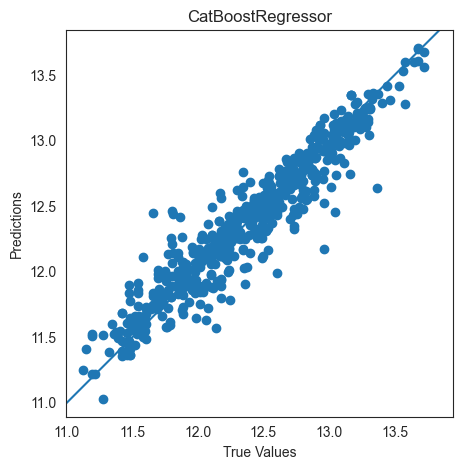

[CatBoostRegressor]CatBoost回归 r2_score: 0.9040864343681003
[CatBoostRegressor]CatBoost回归 mse: 0.029844475194027578
[CatBoostRegressor]CatBoost回归 mae: 0.1236965132087277
[CatBoostRegressor]CatBoost回归 mape: 0.01005068127321706
超参数 {'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estim

In [47]:

X, Y = getxy()

# 获取特征名称
feature_names = X.columns.tolist()

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  # , random_state=42

alpha_ = 12.8
# 定义回归模型列表
models = [
    # LinearRegression(),
    Ridge(alpha=alpha_),
    # Lasso(),
    # ElasticNet(),
    # DecisionTreeRegressor(),
    # RandomForestRegressor(),
    # AdaBoostRegressor(),
    # GradientBoostingRegressor(),
    # XGBRegressor(),
    # LGBMRegressor(),
    CatBoostRegressor(),
    # SVR(),
    # KNeighborsRegressor(),
    # MLPRegressor()
]

modelDict = {
    'LinearRegression': '线性回归',
    'Ridge': '岭回归',
    'Lasso': '套索回归',
    'ElasticNet': '弹性网络回归',
    'DecisionTreeRegressor': '决策树回归',
    'RandomForestRegressor': '随机森林回归',
    'AdaBoostRegressor': 'AdaBoost回归',
    'GradientBoostingRegressor': '梯度提升回归',
    'XGBRegressor': 'XGBoost回归',
    'CatBoostRegressor': 'CatBoost回归',
    'SVR': '支持向量机回归',
    'KNeighborsRegressor': 'K近邻回归',
    'MLPRegressor': '多层感知器回归'
}

# 对每个模型进行训练和测试，并输出R-squared值
for model in models:
    modelName = type(model).__name__
    title = f'[{modelName}]{modelDict[modelName]}'
    print(f'-----------{title}-----------')
    # if type(models).__name__ == 'LGBMRegressor':
    #     model.fit(X_train, y_train, feature_name=feature_names)
    # else:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # r2 = r2_score(y_test, y_pred)

    # 预测并可视化结果
    plt.scatter(y_test, y_pred)
    plt.title(type(model).__name__)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    # plt.xlim([9e4, 1e5])
    # plt.ylim([9e4, 1e5])
    _ = plt.plot([-1e10, 1e10], [-1e10, 1e10])
    plt.tight_layout()
    plt.savefig(f'{modelName}.svg')
    plt.show()

    # 计算均方误差
    print(title, f'r2_score: {r2_score(y_test, y_pred)}')
    print(title, f'mse: {mean_squared_error(y_test, y_pred)}')
    print(title, f'mae: {mean_absolute_error(y_test, y_pred)}')
    print(title, f'mape: {mean_absolute_percentage_error(y_test, y_pred)}')

    # 保存模型
    with open(f'{modelName}.pkl', 'wb') as f:
        pickle.dump(model, f)

    if type(model).__name__ == 'CatBoostRegressor':
        print('超参数', model.get_all_params())

    if type(model).__name__ == 'Ridge':
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef:.5f}")
        print('系数', model.coef_ / alpha_)


In [35]:
def chinese2english(df):
    columnsDict = {
        'Length': '长度',
        'Geographic Region': '地理区域',
        'Country': '国家',
        'Listing Price': '售价',
        'Year': '年份',
        'Make Variant': '名称',
        'LWL': '水线长度',
        'Beam': '宽度',
        'Draft': '吃水',
        'Displacement': '排水',
        'Sail Area': '帆面积',
        'AVG Cargo Thro.': '平均货物吞吐量',
        'GDP': 'GDP',
        'GDP per capita': '人均GDP',
        'Average proportion of total logistics cost to GDP': '物流总成本占GDP的平均比例',
        'Hull Type': '类型',
    }
    print({v: k for k, v in columnsDict.items()})
    return df.rename(columns={v: k for k, v in columnsDict.items()})

{'长度': 'Length', '地理区域': 'Geographic Region', '国家': 'Country', '售价': 'Listing Price', '年份': 'Year', '名称': 'Make Variant', '水线长度': 'LWL', '宽度': 'Beam', '吃水': 'Draft', '排水': 'Displacement', '帆面积': 'Sail Area', '平均货物吞吐量': 'AVG Cargo Thro.', 'GDP': 'GDP', '人均GDP': 'GDP per capita', '物流总成本占GDP的平均比例': 'Average proportion of total logistics cost to GDP', '类型': 'Hull Type'}


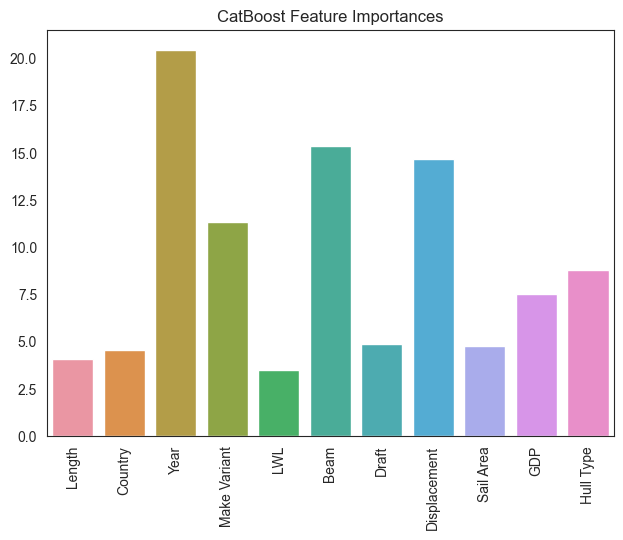

In [36]:
'''
误差分析法
'''
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

catBoostModel = None
features = []
for model in models:
    if not type(model).__name__ == 'CatBoostRegressor':
        continue
    catBoostModel = model
    features = model.feature_importances_

title = 'CatBoost Feature Importances'
engDf = chinese2english(X)
sns.barplot(x=engDf.columns, y=features)
plt.title(title)
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig(f'{title}.svg')
plt.show()

Learning rate set to 0.047824
0:	learn: 0.5442422	total: 1.64ms	remaining: 1.64s
1:	learn: 0.5293668	total: 2.77ms	remaining: 1.38s
2:	learn: 0.5137531	total: 3.84ms	remaining: 1.27s
3:	learn: 0.4988755	total: 4.86ms	remaining: 1.21s
4:	learn: 0.4839427	total: 6ms	remaining: 1.19s
5:	learn: 0.4702502	total: 7.03ms	remaining: 1.16s
6:	learn: 0.4570769	total: 8.07ms	remaining: 1.14s
7:	learn: 0.4439360	total: 9.35ms	remaining: 1.16s
8:	learn: 0.4316710	total: 10.5ms	remaining: 1.15s
9:	learn: 0.4214472	total: 11.8ms	remaining: 1.17s
10:	learn: 0.4098298	total: 12.9ms	remaining: 1.16s
11:	learn: 0.3997870	total: 13.9ms	remaining: 1.14s
12:	learn: 0.3900758	total: 15ms	remaining: 1.14s
13:	learn: 0.3805942	total: 16ms	remaining: 1.13s
14:	learn: 0.3722877	total: 17.1ms	remaining: 1.12s
15:	learn: 0.3642655	total: 18.2ms	remaining: 1.12s
16:	learn: 0.3561129	total: 19.2ms	remaining: 1.11s
17:	learn: 0.3492665	total: 20.3ms	remaining: 1.1s
18:	learn: 0.3422229	total: 21.3ms	remaining: 1.1s
1

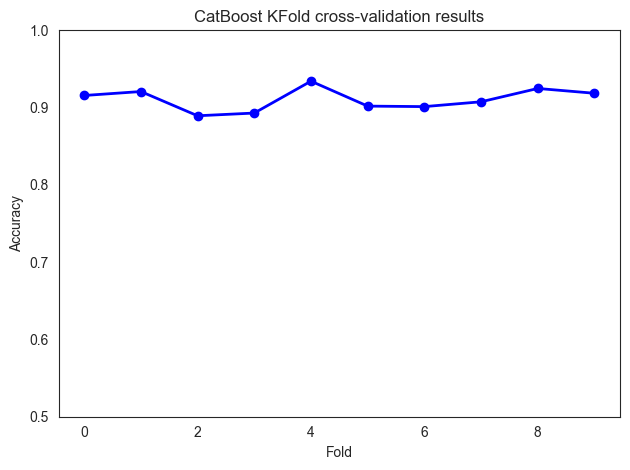

In [37]:
'''
交叉验证法
'''

from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

X, y = getxy()

# 定义CatBoostRegressor模型
model = CatBoostRegressor()

# 定义K-Fold交叉验证
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 定义存储验证结果的列表
scores = []

# 进行交叉验证
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

# 输出平均交叉验证得分
print("Cross-validation scores:", np.mean(scores))

plt.plot(np.arange(len(scores)), scores, 'bo-', linewidth=2)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.title('CatBoost KFold cross-validation results')
plt.tight_layout()
plt.savefig('CatBoost KFold cross-validation results.svg')
plt.show()